# Métricas
Es el momento de saber cómo de bueno es nuestro modelo: calculando e interpretando las métricas para el modelo

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y métricas
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

##### Regresión del modelo **no** balanceado 

In [2]:
df_sinsmot = pd.read_csv("datos/df_codificado_completo.csv", index_col = 0)
df_sinsmot.head()

,Agency Type,Claim,Duration,Net Sales,Commision (in value),Age,product_2 way Comprehensive Plan,product_Basic Plan,product_Cancellation Plan,product_Rental Vehicle Excess Insurance,...,destination_HONG KONG,destination_INDONESIA,destination_JAPAN,destination_MALAYSIA,destination_PHILIPPINES,destination_SINGAPORE,destination_THAILAND,destination_UNITED STATES,destination_VIET NAM,destination_otros
21,1,0,12,46.15,11.54,44,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
22,1,0,7,17.55,4.39,25,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
23,1,1,12,94.00,23.50,34,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
26,0,0,29,9.90,5.94,33,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
27,0,0,28,9.90,5.94,33,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [3]:
# separamos los datos en X e y

X1 = df_sinsmot.drop("Claim", axis = 1)
y1 = df_sinsmot["Claim"]

In [4]:
# separamos en train y test
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [5]:
# definición de regresión logistica

log_reg_sinsmot = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajuste del modelo
log_reg_sinsmot.fit(x_train1,y_train1)

# predicciones para el conjunto de entrenamiento
y_pred_train_sinsmot = log_reg_sinsmot.predict(x_train1)

#  predicciones para el conjunto de test
y_pred_test_sinsmot = log_reg_sinsmot.predict(x_test1)

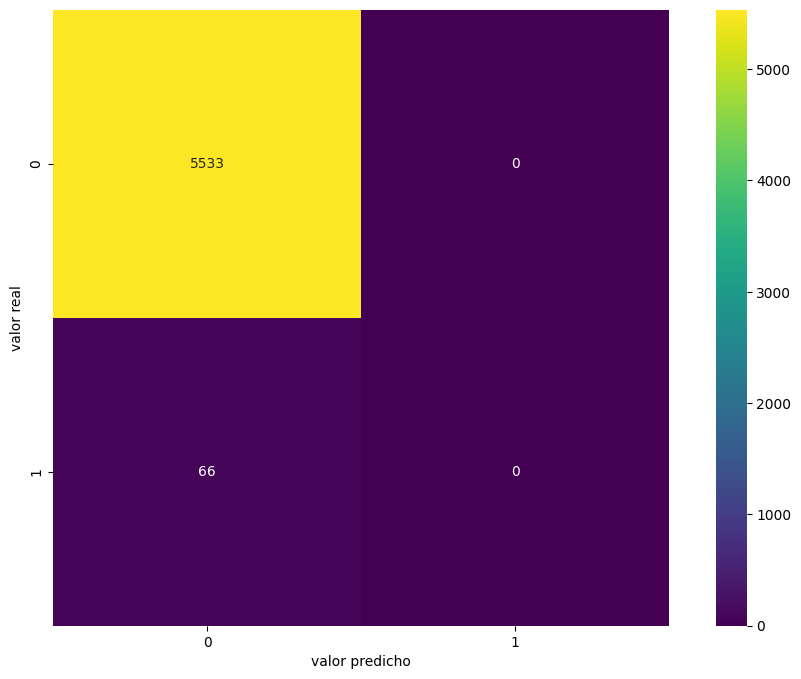

In [6]:
mat_lr_sinsmot = confusion_matrix(y_test1, y_pred_test_sinsmot)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr_sinsmot, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

Los que reclaman es un 1, los que no un 0:

- Para lo que no reclaman, acierta 5533 veces (Verdadero positivo)
- Para los que reclaman no acierta, 0 veces (Verdadero negativo)
- Tenemos 66 falsos no reclamantes, que no iban a reclamar y sí han reclamado (Falso positivo)
- 0 falsos que sí  iban a reclamar según nuestras predicciones y  no han reclamado (Falso negativo)

El modelo no funciona. 

In [7]:
# función para sacar las métricas 

def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [8]:
results_logistic_sinsmot = metricas(y_test1, y_pred_test_sinsmot, y_train1, y_pred_train_sinsmot, "Regresión logistica Sin Balanceo")
results_logistic_sinsmot

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.988212,0.0,0.0,0.0,0.0,test,Regresión logistica Sin Balanceo
1,0.985711,0.0,0.0,0.0,0.0,train,Regresión logistica Sin Balanceo


MÉTRICAS

- **Accuracy** es cercana a un 1, es decir, que  acierta casi el 100%, pero lo demás está en 0, no sirve de mucho. Está acertando los que no reclaman.

- En **precision**(porcentaje de aciertos postivos) está en 0. 

- **Recall** (recogería los falsos negativos y los los verdaderos positivos) resulta 0.

- **f1** (la media entre precisión y recall) cuanto más cerca de 1 mejor y resulta 0.

- **Kappa**  explica si estamos acertando por azar o no, al estar lejos del 1, está acertando por azar.

- Los valores de train y test son muy similares, por lo que no se detecta **ni overfitting ni underfitting**.



##### Regresión del modelo **balanceado**:

In [9]:
df_smot = pd.read_csv("datos/df_codificado_balanceado.csv", index_col = 0)
df_smot.head()

,Agency Type,Duration,Net Sales,Commision (in value),Age,product_2 way Comprehensive Plan,product_Basic Plan,product_Cancellation Plan,product_Rental Vehicle Excess Insurance,product_otros_productos,...,destination_INDONESIA,destination_JAPAN,destination_MALAYSIA,destination_PHILIPPINES,destination_SINGAPORE,destination_THAILAND,destination_UNITED STATES,destination_VIET NAM,destination_otros,Claim
0,0,28,93.0,0.00,36,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,10,29.7,17.82,33,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,1,4,22.0,7.70,48,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,10,26.5,17.23,36,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,23,20.0,0.00,31,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
# división de los datos en X e y

X2 = df_smot.drop("Claim", axis = 1)
y2 = df_smot["Claim"]

In [11]:
# división en train y test
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [12]:
# definición la regresión logistica

log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajuste del modelo
log_reg.fit(x_train2,y_train2)

# predicciones para el conjunto de entrenamiento
y_pred_train = log_reg.predict(x_train2)

# predicciones para el conjunto de test
y_pred_test = log_reg.predict(x_test2)

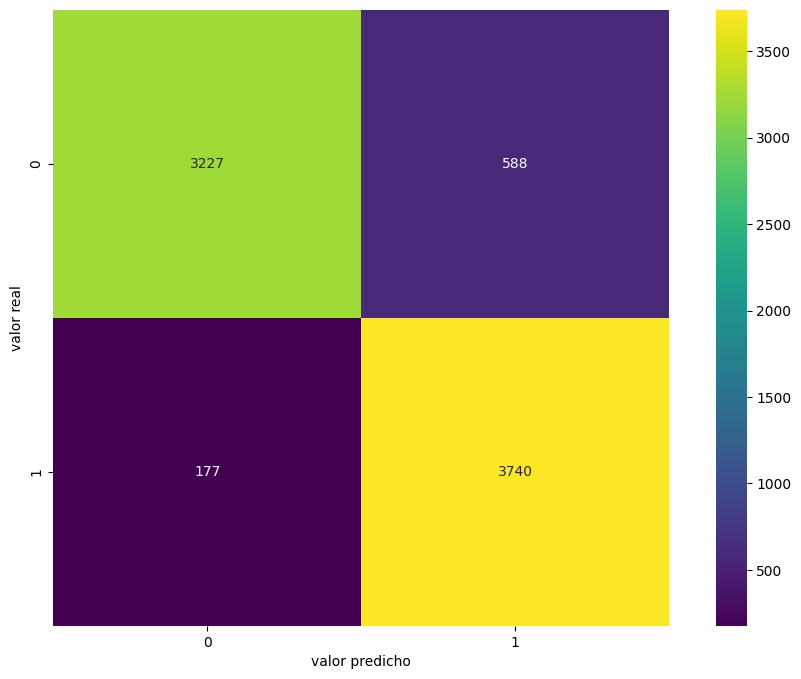

In [13]:
mat_lr2 = confusion_matrix(y_test2, y_pred_test)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr2, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

Los que reclaman es un 1, los que no un 0:

- Para lo que no reclaman, acierta 3227 veces (Verdaderos positivos)
- Para los que reclama acierta, 3740 veces (Verdadero negativo)
- Tenemos 177 falsos no reclamantes, que no iban a reclamar y sí han reclamado (Falsos positivos)
- 558 falsos que sí  iban a reclamar según nuestras predicciones y  no han reclamado (Falsos negativos)



In [14]:
results_logistic = metricas(y_test2, y_pred_test, y_train2, y_pred_train, "Regresión logistica Balanceado")
results_logistic

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.901061,0.864140,0.954812,0.907216,0.801809,test,Regresión logistica Balanceado
1,0.898241,0.856893,0.955359,0.903451,0.796557,train,Regresión logistica Balanceado


MÉTRICAS

- **accuracy** cercana a un 1, es decir, que  acierta casi el 100%.

- **precision** (porcentaje de aciertos postivos) también es casi del 100%.
- **f1** sería la media entre precisión y recall, cuanto más cerca de 1 mejor. El 0.90 es buen resultado.

- **kappa** nos explica si estamos acertando por azar o no. Al estar cerca del 1, no está acertando por azar.

- Los valores de train y test son muy similares, por lo que no hay **ni overfitting ni underfitting**.



##### Comparativa:

In [15]:
resultados_todo = pd.concat([results_logistic_sinsmot, results_logistic], axis = 0)
resultados_todo

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.988212,0.000000,0.000000,0.000000,0.000000,test,Regresión logistica Sin Balanceo
1,0.985711,0.000000,0.000000,0.000000,0.000000,train,Regresión logistica Sin Balanceo
0,0.901061,0.864140,0.954812,0.907216,0.801809,test,Regresión logistica Balanceado
1,0.898241,0.856893,0.955359,0.903451,0.796557,train,Regresión logistica Balanceado


In [16]:
resultados_todo.to_csv("datos/resultados_logistica.csv")